<a href="https://colab.research.google.com/github/DeepthiManthapuram/Deep_Learning/blob/main/Spam_detection_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏢 Business Scenario: Email Spam Detection for a Startup
A startup company is building a basic email filtering system to classify emails as:
1 → Spam
0 → Not Spam
The company wants to first implement a simple Perceptron model before moving to complex neural networks.
They identified two key binary features from emails:
Contains Suspicious Keywords (e.g., “lottery”, “prize”, “urgent”)
Yes → 1
No → 0
Sender is Unknown
Yes → 1
No → 0
So each email is represented as:

Part 1 – Conceptual Understanding
Is this dataset linearly separable?
Can a single-layer Perceptron solve this problem?
What logical function does this resemble?


Part 3 – Decision Boundary
After training:
Write the final equation of the decision boundary.
Plot the decision boundary.
Explain geometrically how Perceptron separates spam and non-spam emails.
Part 4 – Critical Thinking
What happens if we change E3 output to 0?
Will Perceptron still converge?
If not, why?
What limitation of Perceptron does this expose?


In [12]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([1, 1, 0, 0])
x, y

(array([[1, 1],
        [1, 0],
        [0, 1],
        [0, 0]]),
 array([1, 1, 0, 0]))

In [13]:
#Initialising parameters
w = np.zeros(2)
b = 0
learning_rate = 0.1
epochs = 7

print("Initial weights: ",w)
print("Initial Bias: ",b)

Initial weights:  [0. 0.]
Initial Bias:  0


In [14]:
def step_function(z):
  return 1 if z >= 0 else 0

In [15]:
for epoch in range(epochs):
  print(f"\nEpoch {epoch + 1}")
  for i in range(len(x)):
    #1. compute weighted sum
    z = np.dot(w, x[i]) + b

    #2. Apply activation function
    y_pred = step_function(z)

    #3. compute error
    error = y[i] - y_pred

    #4. update weight
    w = w + learning_rate * error * x[i]

    #5. update bias
    b = b + learning_rate * error

    print(f"Input: {x[i]}, Predicted: {y_pred}, Actual: {y[i]}, w: {w}, b: {b}" )


Epoch 1
Input: [1 1], Predicted: 1, Actual: 1, w: [0. 0.], b: 0.0
Input: [1 0], Predicted: 1, Actual: 1, w: [0. 0.], b: 0.0
Input: [0 1], Predicted: 1, Actual: 0, w: [ 0.  -0.1], b: -0.1
Input: [0 0], Predicted: 0, Actual: 0, w: [ 0.  -0.1], b: -0.1

Epoch 2
Input: [1 1], Predicted: 0, Actual: 1, w: [0.1 0. ], b: 0.0
Input: [1 0], Predicted: 1, Actual: 1, w: [0.1 0. ], b: 0.0
Input: [0 1], Predicted: 1, Actual: 0, w: [ 0.1 -0.1], b: -0.1
Input: [0 0], Predicted: 0, Actual: 0, w: [ 0.1 -0.1], b: -0.1

Epoch 3
Input: [1 1], Predicted: 0, Actual: 1, w: [0.2 0. ], b: 0.0
Input: [1 0], Predicted: 1, Actual: 1, w: [0.2 0. ], b: 0.0
Input: [0 1], Predicted: 1, Actual: 0, w: [ 0.2 -0.1], b: -0.1
Input: [0 0], Predicted: 0, Actual: 0, w: [ 0.2 -0.1], b: -0.1

Epoch 4
Input: [1 1], Predicted: 1, Actual: 1, w: [ 0.2 -0.1], b: -0.1
Input: [1 0], Predicted: 1, Actual: 1, w: [ 0.2 -0.1], b: -0.1
Input: [0 1], Predicted: 0, Actual: 0, w: [ 0.2 -0.1], b: -0.1
Input: [0 0], Predicted: 0, Actual: 0, w:

In [16]:
print("\n Final weight: ",w)
print("\n Final bias: ",b)


 Final weight:  [ 0.2 -0.1]

 Final bias:  -0.1


In [17]:
print("Testing")
for i in range(len(x)):
  z = np.dot(w, x[i]) + b
  prediction = step_function(z)

  print("Input: ",x[i], "Prediction: ", prediction)

Testing
Input:  [1 1] Prediction:  1
Input:  [1 0] Prediction:  1
Input:  [0 1] Prediction:  0
Input:  [0 0] Prediction:  0


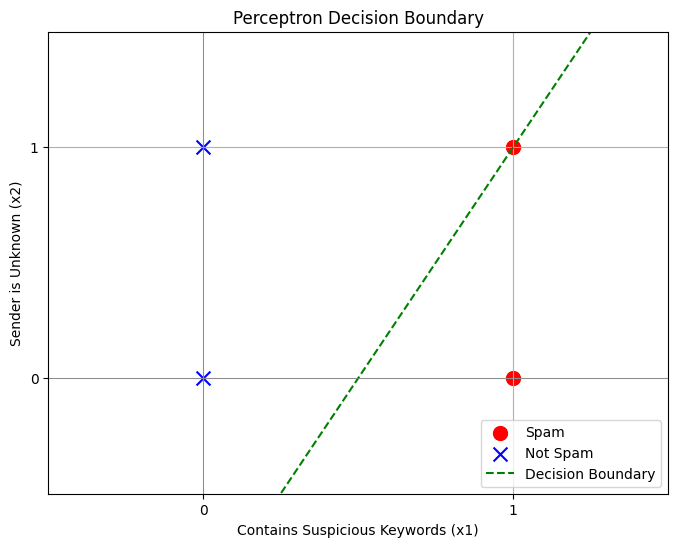

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get the final weights and bias from the trained perceptron
final_w = w
final_b = b

# Define the decision boundary equation: w[0]*x1 + w[1]*x2 + b = 0
# To plot, we can solve for x2: x2 = (-w[0]*x1 - b) / w[1]

# Create a range for x1 (feature 1: Suspicious Keywords)
x1_values = np.array([-0.5, 1.5]) # A bit outside the 0-1 range to show the line clearly

# Calculate corresponding x2 values (feature 2: Sender is Unknown)
# Handle the case where w[1] might be zero, though in this case it's not.
if final_w[1] != 0:
    x2_values = (-final_w[0] * x1_values - final_b) / final_w[1]
else: # If w[1] is zero, the boundary is a vertical line x1 = -b/w[0]
    x2_values = np.array([-0.5, 1.5]) # Arbitrary range for x2
    x1_values = np.full_like(x2_values, -final_b / final_w[0])

# Plot the data points
plt.figure(figsize=(8, 6))
for i in range(len(x)):
    if y[i] == 1:
        plt.scatter(x[i][0], x[i][1], color='red', marker='o', s=100, label='Spam' if i == 0 else "")
    else:
        plt.scatter(x[i][0], x[i][1], color='blue', marker='x', s=100, label='Not Spam' if i == 3 else "")

# Plot the decision boundary
plt.plot(x1_values, x2_values, color='green', linestyle='--', label='Decision Boundary')

plt.title('Perceptron Decision Boundary')
plt.xlabel('Contains Suspicious Keywords (x1)')
plt.ylabel('Sender is Unknown (x2)')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True)
plt.axvline(0, color='gray', linewidth=0.5)
plt.axhline(0, color='gray', linewidth=0.5)
plt.legend()
plt.show()
